<a href="https://colab.research.google.com/github/sydoky/Transfer-Learning-with-Tensorflow-Fine-Tuning-Practice/blob/main/Transfer_Learning_with_Tensorflow_Fine_Tuning_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Question 1**

# **First this we do is setting up the data**

In [1]:
#Get helper_functions.py script from course GitHub
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 

# Import helper functions we're going to use
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data,walk_through_dir

--2022-07-06 14:27:21--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-07-06 14:27:21 (109 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [2]:
# Get 10% of the data of the 10 classes
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 

unzip_data("10_food_classes_10_percent.zip")

--2022-07-06 14:27:26--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.16.128, 142.251.45.112, 172.217.13.240, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.16.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip’

10_food_classes_10_ 100%[===================>] 160.74M   189MB/s    in 0.8s    

2022-07-06 14:27:27 (189 MB/s) - ‘10_food_classes_10_percent.zip’ saved [168546183/168546183]



In [3]:
#walk through 10 percent data directory and list number of files

walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/train'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are 0 directories and 75 images in '10_food_classes_10_percent/train/sushi'.
There are 0 directories and 75 images in '10_food_classes_10_percent/tra

In [4]:
#Create training and test directories 
train_dir="10_food_classes_10_percent/train"
test_dir="10_food_classes_10_percent/test"

In [5]:
#Creating train and test data. Train comes first. 
import tensorflow as tf
IMG_SIZE=(224,224)
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,image_size=IMG_SIZE,
                                                                           label_mode="categorical",
                                                                           batch_size=32) #train data/train comes first

test_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,image_size=IMG_SIZE,
                                                                         label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [6]:
#I have to create a checkpoint callback first. We need to create a callback to save the results
checkpoint_path="food_vision_checkpoint/"

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                       save_weights_only=True,
                                                       save_best_only=False)



In [7]:
#Creating a base model
input_shape=(224,224,3)

base_model=tf.keras.applications.EfficientNetB0(include_top=False) #for tuning the model

base_model.trainalbe=False

#Now create inputs
inputs=tf.keras.layers.Input(shape=(224,224,3))

x=base_model(inputs)

#Average pool the outputs of the base model
x=tf.keras.layers.GlobalAveragePooling2D()(x)

#Now I have to make an output layer
outputs=tf.keras.layers.Dense(10,activation="softmax")(x)

#Now I have to combine the model
model_1=tf.keras.Model(inputs,outputs)



16719872/16705208 [==============================] - 0s 0us/step


In [8]:
from tensorflow.python.ops.variables import validate_synchronization_aggregation_trainable
#Now we have to compile the model and fit the model
#1 Compile
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#2 Fit the model
#Since we created initial callback, we are going to use it
initial_epochs=5
history=model_1.fit(train_data_10_percent,
                  epochs=initial_epochs+5,
                  validation_data=test_data_10_percent,
                  validation_steps=len(test_data_10_percent),
                  callbacks=[checkpoint_callback])

Epoch 1/10
24/24 [==============================] - 37s 691ms/step - loss: 1.3066 - accuracy: 0.5813 - val_loss: 1.7885 - val_accuracy: 0.5464
Epoch 2/10
24/24 [==============================] - 14s 594ms/step - loss: 0.2683 - accuracy: 0.9253 - val_loss: 1.9352 - val_accuracy: 0.5772
Epoch 3/10
24/24 [==============================] - 14s 577ms/step - loss: 0.1019 - accuracy: 0.9747 - val_loss: 1.3447 - val_accuracy: 0.6936
Epoch 4/10
24/24 [==============================] - 14s 575ms/step - loss: 0.0947 - accuracy: 0.9680 - val_loss: 1.0097 - val_accuracy: 0.7504
Epoch 5/10
24/24 [==============================] - 14s 577ms/step - loss: 0.0817 - accuracy: 0.9760 - val_loss: 0.8767 - val_accuracy: 0.7852
Epoch 6/10
24/24 [==============================] - 14s 570ms/step - loss: 0.0487 - accuracy: 0.9840 - val_loss: 1.2641 - val_accuracy: 0.7296
Epoch 7/10
24/24 [==============================] - 14s 564ms/step - loss: 0.1392 - accuracy: 0.9680 - val_loss: 1.1066 - val_accuracy: 0.7236

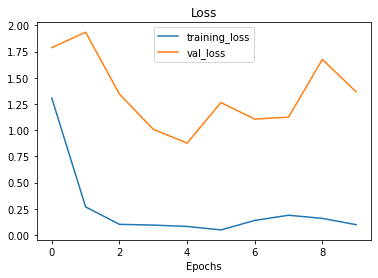

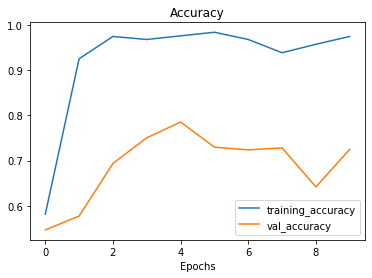

In [9]:
plot_loss_curves(history)

# **Question 2**

In [10]:
#To begin fine-tuning,we'll unfreeze the entire base model by setting its trainable attribute to True
base_model.trainable=True

#Freeze all layers except for the 20
for layer in base_model.layers[:-20]:
  layer.trainable=False 

#Recompile the model
model_1.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=["accuracy"])


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
#Now we have to fit the fine tuninig
fine_tune_epochs=20 
history_fine_tuninig=model_1.fit(train_data_10_percent,
                                 epochs=fine_tune_epochs,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data_10_percent,
                                 validation_steps=len(test_data_10_percent),
                                 initial_epoch=history.epoch[-1]) #because I want to start from the last one epoch

Epoch 10/20
24/24 [==============================] - 14s 377ms/step - loss: 0.1122 - accuracy: 0.9653 - val_loss: 1.0013 - val_accuracy: 0.7684
Epoch 11/20
24/24 [==============================] - 8s 325ms/step - loss: 0.0683 - accuracy: 0.9787 - val_loss: 0.8659 - val_accuracy: 0.7848
Epoch 12/20
24/24 [==============================] - 8s 324ms/step - loss: 0.0635 - accuracy: 0.9840 - val_loss: 0.8072 - val_accuracy: 0.7952
Epoch 13/20
24/24 [==============================] - 8s 324ms/step - loss: 0.0438 - accuracy: 0.9920 - val_loss: 0.7597 - val_accuracy: 0.8020
Epoch 14/20
24/24 [==============================] - 8s 324ms/step - loss: 0.0495 - accuracy: 0.9880 - val_loss: 0.7344 - val_accuracy: 0.8052
Epoch 15/20
24/24 [==============================] - 8s 325ms/step - loss: 0.0284 - accuracy: 0.9947 - val_loss: 0.7254 - val_accuracy: 0.8072
Epoch 16/20
24/24 [==============================] - 9s 374ms/step - loss: 0.0283 - accuracy: 0.9973 - val_loss: 0.7163 - val_accuracy: 0.810

# **Question 3**

In [13]:
base_model.trainale=True

for layer in base_model.layers[:-30]:
  layer.trainalbe=False

  model_1.compile(loss="categorical_crossentropy",
                  optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                  metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [15]:
#Now I have to fit it
fine_tune_epochs=30
history_fine_tuninig=model_1.fit(train_data_10_percent,
                                 epochs=fine_tune_epochs,
                                 steps_per_epoch=len(train_data_10_percent),
                                 validation_data=test_data_10_percent,
                                 validation_steps=len(test_data_10_percent),
                                 initial_epoch=history.epoch[-1])

Epoch 10/30
24/24 [==============================] - 15s 380ms/step - loss: 0.0195 - accuracy: 0.9933 - val_loss: 0.7023 - val_accuracy: 0.8132
Epoch 11/30
24/24 [==============================] - 8s 325ms/step - loss: 0.0219 - accuracy: 0.9933 - val_loss: 0.6986 - val_accuracy: 0.8132
Epoch 12/30
24/24 [==============================] - 8s 329ms/step - loss: 0.0138 - accuracy: 0.9973 - val_loss: 0.6984 - val_accuracy: 0.8132
Epoch 13/30
24/24 [==============================] - 8s 328ms/step - loss: 0.0152 - accuracy: 0.9973 - val_loss: 0.7028 - val_accuracy: 0.8140
Epoch 14/30
24/24 [==============================] - 8s 323ms/step - loss: 0.0109 - accuracy: 0.9960 - val_loss: 0.7058 - val_accuracy: 0.8152
Epoch 15/30
24/24 [==============================] - 8s 323ms/step - loss: 0.0066 - accuracy: 1.0000 - val_loss: 0.7126 - val_accuracy: 0.8180
Epoch 16/30
24/24 [==============================] - 8s 323ms/step - loss: 0.0154 - accuracy: 0.9947 - val_loss: 0.7108 - val_accuracy: 0.816

# **Question 4**

(-0.5, 511.5, 511.5, -0.5)

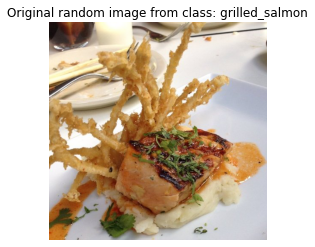

In [19]:
#View Random Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


import os
import random

target_class=random.choice(train_data_10_percent.class_names) #Choose a Random class 

target_dir="10_food_classes_10_percent/train/"+target_class #Create the target directory

random_image=random.choice(os.listdir(target_dir)) #Choose a random image from the target directory

random_image_path=target_dir+"/"+random_image #Create The Random choosen image path

img=mpimg.imread(random_image_path)
plt.imshow(img)
plt.title("Original random image from class: {}".format(target_class))
plt.axis(False) #Turn of the axes
